# Simple Handwritten Digit Classifier

## Load and view the data

In [1]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The data has already been splitted into train and test set
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

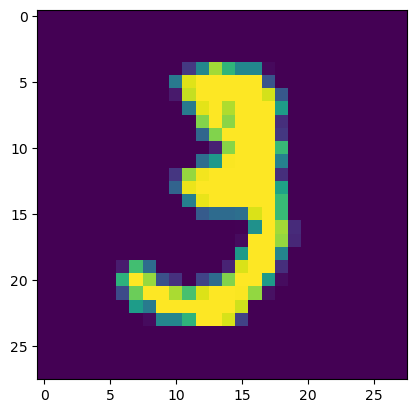

In [5]:
# Plot a single sample
plt.imshow(train_data[10]);

In [6]:
# Check out sample label
train_labels[10]

3

Text(0.5, 1.0, '4')

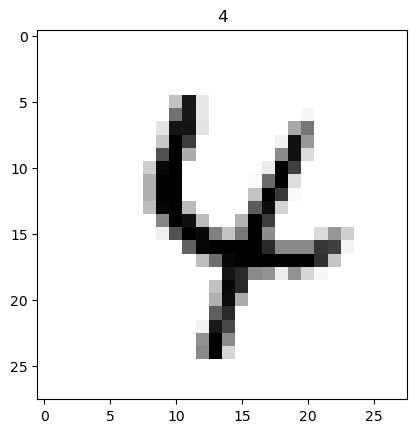

In [7]:
# Plot an example image and its label
index_of_choice = 142
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(train_labels[index_of_choice])

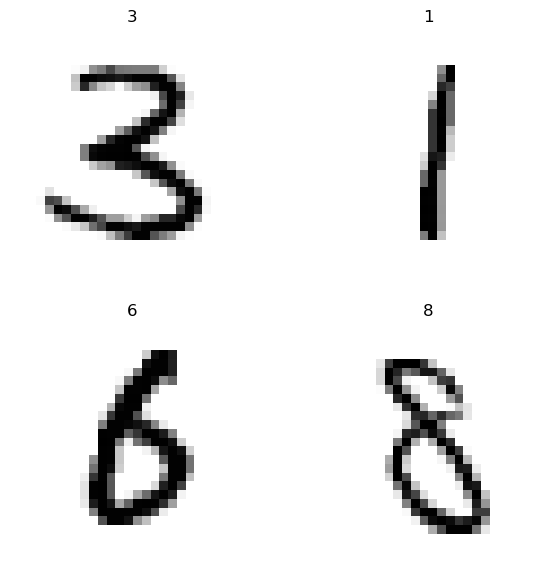

In [8]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False);

## Building a multiclass classification model

In [9]:
# Check the min and max of train data
train_data.min(), train_data.max()

(0, 255)

In [10]:
# Normalize train/test data
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

### Base model

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(4, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_norm,
                       train_labels,
                       epochs=5,
                       validation_data=(test_data_norm, test_labels))

Metal device set to: Apple M1
Epoch 1/5


2023-05-28 17:58:13.870871: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 11s 6ms/step - loss: 1.0019 - accuracy: 0.6753 - val_loss: 0.6765 - val_accuracy: 0.7884
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6335 - accuracy: 0.8099 - val_loss: 0.6009 - val_accuracy: 0.8215
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5832 - accuracy: 0.8275 - val_loss: 0.5668 - val_accuracy: 0.8345
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5527 - accuracy: 0.8410 - val_loss: 0.5480 - val_accuracy: 0.8441
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5331 - accuracy: 0.8482 - val_loss: 0.5319 - val_accuracy: 0.8522


### Second model - try CNN

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_norm,
                        train_labels,
                        epochs=5,
                        validation_data=(test_data_norm, test_labels))


Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2076 - accuracy: 0.9401 - val_loss: 0.0964 - val_accuracy: 0.9702
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0790 - accuracy: 0.9775 - val_loss: 0.0656 - val_accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0603 - accuracy: 0.9824 - val_loss: 0.0574 - val_accuracy: 0.9809
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0539 - val_accuracy: 0.9827


### Let's combine these models

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1438 - accuracy: 0.9558 - val_loss: 0.0528 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0351 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0276 - val_accuracy: 0.9923
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0322 - val_accuracy: 0.9906
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0362 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0343 -

<Axes: >

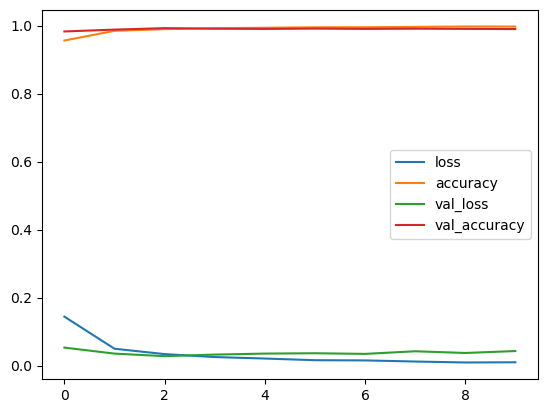

In [14]:
pd.DataFrame(history_3.history).plot()

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate images within the range of 10 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by a fraction of the width
    height_shift_range=0.1,  # Randomly shift images vertically by a fraction of the height
    zoom_range=0.1,  # Randomly zoom images by a factor of 0.1
    horizontal_flip=True  # Randomly flip images horizontally
)

# Fit the ImageDataGenerator to the training data
datagen.fit(train_data_norm.reshape(-1, 28, 28, 1))

# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Fit the model with augmented data
history_4 = model_4.fit(datagen.flow(train_data_norm.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
                        epochs=10,
                        validation_data=(test_data_norm.reshape(-1, 28, 28, 1), test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4477 - accuracy: 0.8505 - val_loss: 0.1056 - val_accuracy: 0.9651
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1708 - accuracy: 0.9470 - val_loss: 0.0698 - val_accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1310 - accuracy: 0.9578 - val_loss: 0.0885 - val_accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1106 - accuracy: 0.9654 - val_loss: 0.0604 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0996 - accuracy: 0.9690 - val_loss: 0.0506 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0912 - accuracy: 0.9716 - val_loss: 0.0625 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0859 - accuracy: 0.9729 - val_loss: 0.0496 -

In [16]:
# Data augmentation does not help, let's keep model 3
# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])

# Create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/10))

# Fit the model
history_5 = model_5.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels),
                       callbacks=[lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1500 - accuracy: 0.9535 - val_loss: 0.0644 - val_accuracy: 0.9788 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0533 - accuracy: 0.9832 - val_loss: 0.0558 - val_accuracy: 0.9813 - lr: 0.0013
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0381 - val_accuracy: 0.9870 - lr: 0.0016
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.0448 - val_accuracy: 0.9875 - lr: 0.0020
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0324 - val_accuracy: 0.9901 - lr: 0.0025
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0481 - val_accuracy: 0.9859 - lr: 0.0032
Epoch 7/10
1875/1875 [========================

Text(0.5, 1.0, 'finding the ideal learning rate')

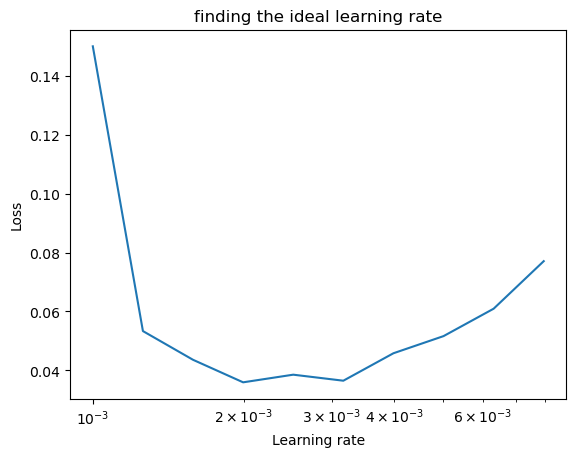

In [17]:
lrs = 1e-3 * (10**(tf.range(10)/10))
plt.semilogx(lrs, history_5.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("finding the ideal learning rate")

In [18]:
# Data augmentation does not help, let's keep model 3
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.002),
                 metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1301 - accuracy: 0.9588 - val_loss: 0.0643 - val_accuracy: 0.9789
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0571 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0330 - val_accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0403 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0374 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0584 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0440 -

<Axes: >

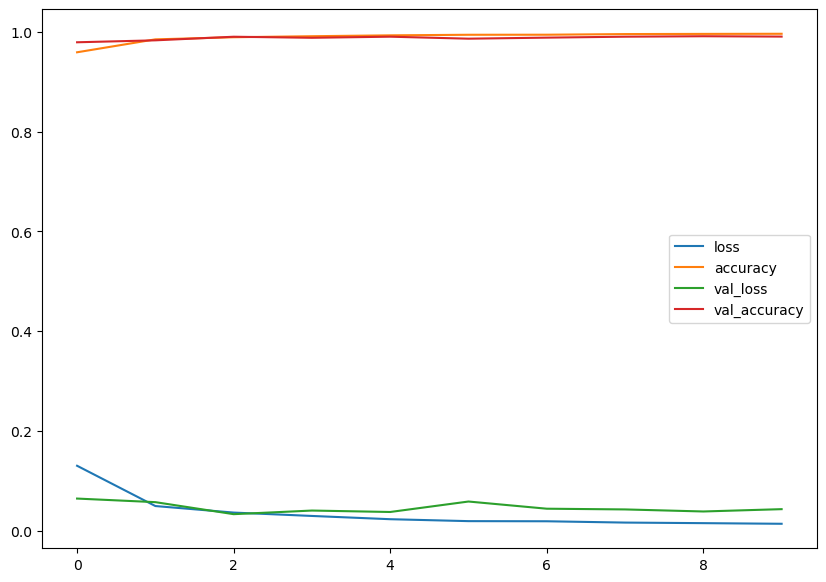

In [19]:
pd.DataFrame(history_6.history).plot(figsize=(10,7)) 

In [22]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 128)              